In [1]:
import os

# Ruta relativa desde la carpeta del modelo al archivo CSV
file_path = '../data/processed/Provincial/df_final_provincial.csv'

# Comprobar si el archivo existe
if os.path.exists(file_path):
    print("El archivo existe en la ruta especificada.")
else:
    print("El archivo no se encuentra en la ruta especificada.")


El archivo existe en la ruta especificada.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(file_path)

In [3]:
# Convertir la fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Descomponer la fecha en año y mes
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Codificar la columna 'provincia' como números usando LabelEncoder
le = LabelEncoder()
df['provincia_encoded'] = le.fit_transform(df['provincia'])

In [4]:
df

,fecha,provincia,ccs_promedio_provincial,ufc_promedio_provincial,año,mes,provincia_encoded
0,2014-01-01,Buenos Aires,447,109,2014,1,0
1,2014-02-01,Buenos Aires,483,121,2014,2,0
2,2014-03-01,Buenos Aires,476,115,2014,3,0
3,2014-04-01,Buenos Aires,467,117,2014,4,0
4,2014-05-01,Buenos Aires,467,90,2014,5,0
...,...,...,...,...,...,...,...
379,2018-12-01,Santiago del Estero,401,90,2018,12,5
380,2019-01-01,Santiago del Estero,456,129,2019,1,5
381,2019-02-01,Santiago del Estero,509,82,2019,2,5
382,2019-03-01,Santiago del Estero,445,62,2019,3,5


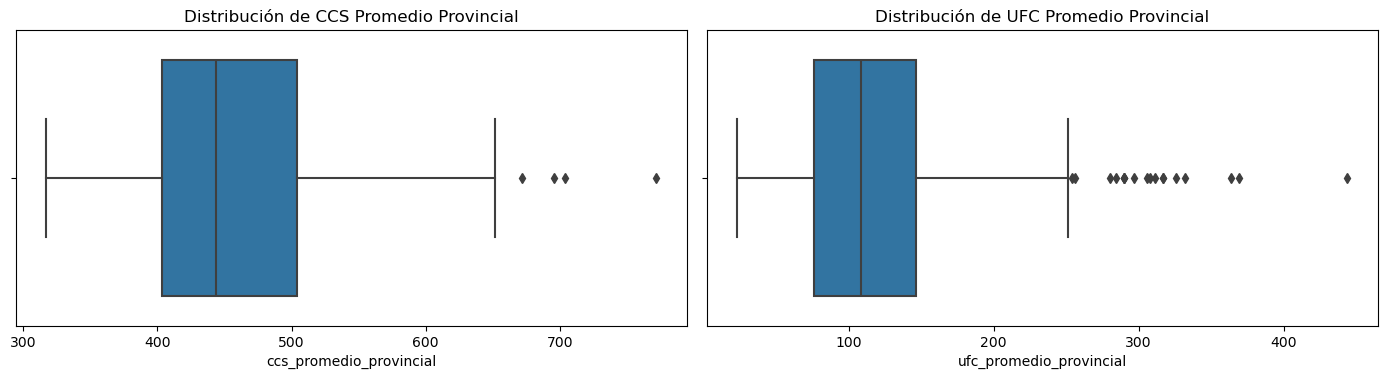

In [5]:
# Creamos el grafico Boxplot
plt.figure(figsize=(14, 7))

# Boxplot para ccs_promedio_provincial
plt.subplot(2, 2, 3)
sns.boxplot(x='ccs_promedio_provincial', data=df)
plt.title('Distribución de CCS Promedio Provincial')

# Boxplot para ufc_promedio_provincial
plt.subplot(2, 2, 4)
sns.boxplot(x='ufc_promedio_provincial', data=df)
plt.title('Distribución de UFC Promedio Provincial')

plt.tight_layout()
plt.show()

In [6]:
# Calcular la media de la columna 'ufc_promedio_provincial'
mean_ufc_provincial = df['ufc_promedio_provincial'].mean()

# Aplicar la condición y reemplazar los valores mayores a 310
df.loc[df['ufc_promedio_provincial'] > 310, 'ufc_promedio_provincial'] = mean_ufc_provincial

# Calcular la media de la columna 'ufc_promedio_provincial'
mean_ccs_provincial = df['ccs_promedio_provincial'].mean()

# Aplicar la condición y reemplazar los valores mayores a 670
df.loc[df['ccs_promedio_provincial'] > 670, 'ccs_promedio_provincial'] = mean_ccs_provincial

C:\Users\matyd\AppData\Local\Temp\ipykernel_13796\2626772241.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '121.74739583333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['ufc_promedio_provincial'] > 310, 'ufc_promedio_provincial'] = mean_ufc_provincial
C:\Users\matyd\AppData\Local\Temp\ipykernel_13796\2626772241.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '459.265625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['ccs_promedio_provincial'] > 670, 'ccs_promedio_provincial'] = mean_ccs_provincial


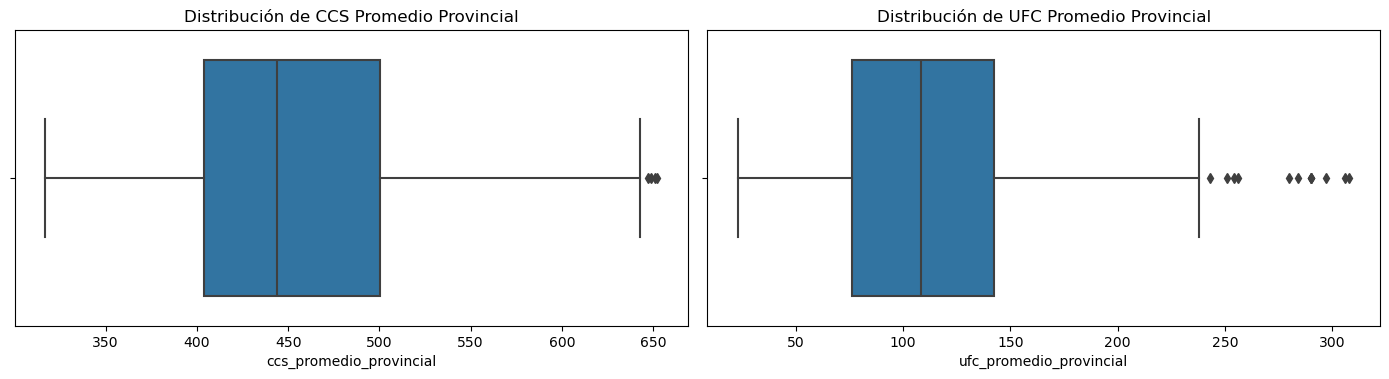

In [7]:
# Crear el boxplot
plt.figure(figsize=(14, 7))

# Boxplot para ccs_promedio_provincial
plt.subplot(2, 2, 3)
sns.boxplot(x='ccs_promedio_provincial', data=df)
plt.title('Distribución de CCS Promedio Provincial')

# Boxplot para ufc_promedio_provincial
plt.subplot(2, 2, 4)
sns.boxplot(x='ufc_promedio_provincial', data=df)
plt.title('Distribución de UFC Promedio Provincial')

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# Seleccionar las características (features) y la variable objetivo (target)
X = df[['ufc_promedio_provincial', 'año', 'mes', 'provincia_encoded']]
y = df['ccs_promedio_provincial']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=245)

# Inicializar y entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=45)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error en Entrenamiento: {mse_train}')
print(f'R-squared en Entrenamiento: {r2_train}')
print(f'Mean Squared Error en Prueba: {mse_test}')
print(f'R-squared en Prueba: {r2_test}')

Mean Squared Error en Entrenamiento: 691.5043003357466
R-squared en Entrenamiento: 0.87164012744167
Mean Squared Error en Prueba: 786.0790141539869
R-squared en Prueba: 0.8365656099624156


76.13% Error: 1512 (original)

74%.55% Error: 1425 (290, 670)

74.95% Error 1102 (290, 670) Random_state=100

80.23% Error 1207 (290, 670) Random_state=109

78.09% Error 991 (290, 670) Random_state=162

78.35% Error 963 (290, 670) Random_state=204

82.17% Error 1037 (290, 670) Random_state=237

81.77% Error 921 (290, 670) Random_State=245

80.59% Error 827 (290, 670) Random_state=289

82.51% Error 841 (290, 670) Random_state=245 test size 0.1

82.58% Error 837 (290, 670) Random_state=245 test size 0.1 gbmodel_Random_state=45

83.47% Error 794 (300, 670) Random_state=245 test size 0.1
gbmodel_Random_state=45

83.65% Error 786 (310, 670) Random_state=245 test size 0.1
gbmodel_Random_state=45

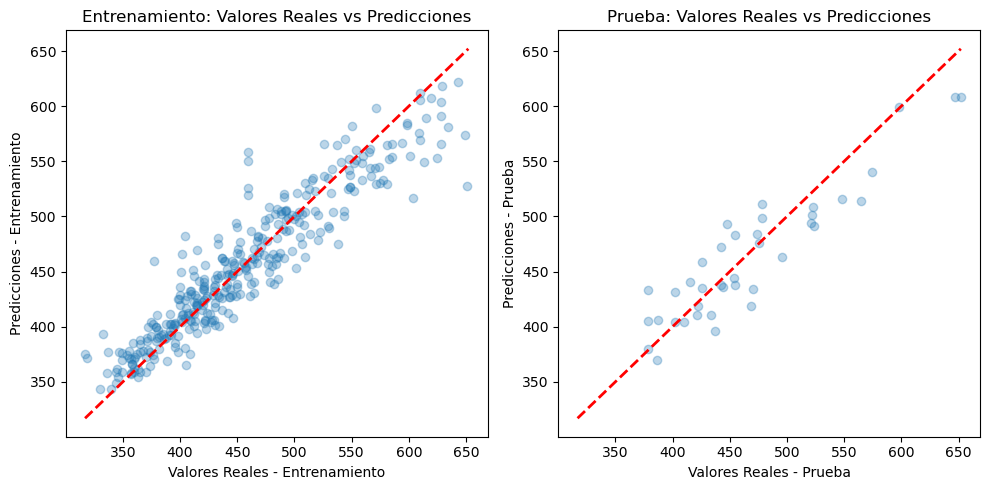

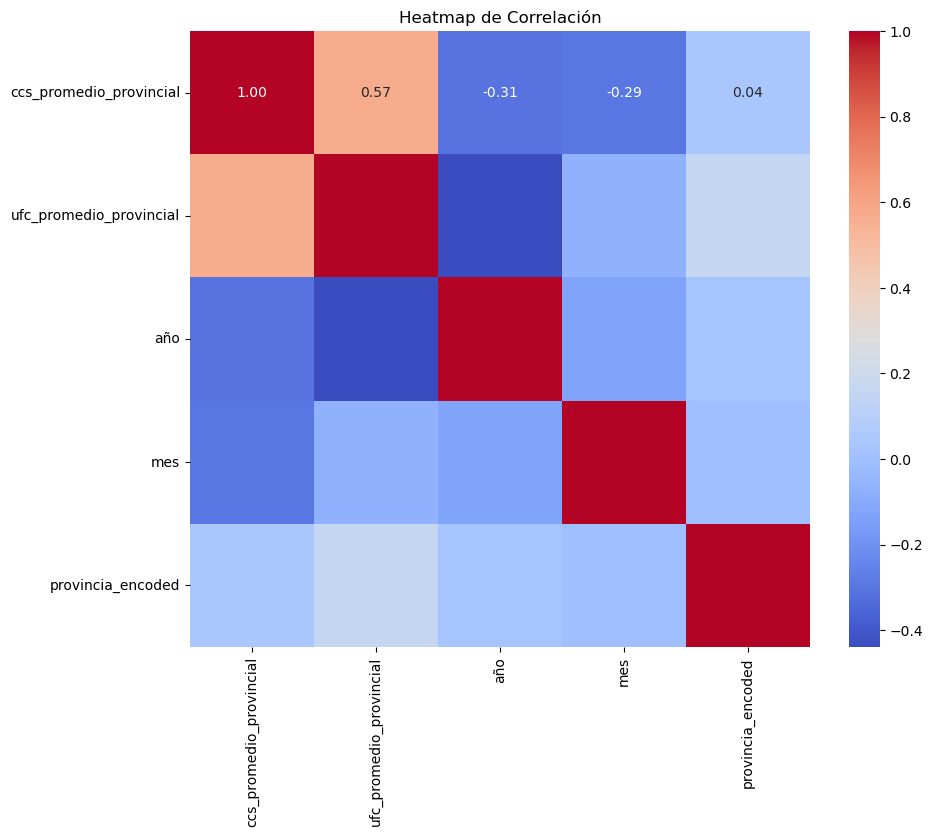

In [9]:
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de las predicciones vs. valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales - Entrenamiento')
plt.ylabel('Predicciones - Entrenamiento')
plt.title('Entrenamiento: Valores Reales vs Predicciones')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales - Prueba')
plt.ylabel('Predicciones - Prueba')
plt.title('Prueba: Valores Reales vs Predicciones')

plt.tight_layout()
plt.show()

# Heatmap de correlación para ver la relación entre las características
numeric_df = df.select_dtypes(include=['number'])

# Heatmap de correlación para ver la relación entre las características numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlación')
plt.show()

In [10]:
param_grid_extended = {
    'n_estimators': [1366],
    'subsample': [0.7],
    'learning_rate': [0.01],
    'max_depth': [4],
    'min_samples_split': [20],
    'min_samples_leaf': [8]
}

grid_search_extended = GridSearchCV(estimator=gb_model, param_grid=param_grid_extended,
                                    cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search_extended.fit(X_train, y_train)

# Obtener los mejores parámetros del GridSearch ampliado
best_params_extended = grid_search_extended.best_params_
print(f'Mejores hiperparámetros (extendido): {best_params_extended}')

# Evaluar el modelo con los mejores parámetros del GridSearch ampliado
best_model_extended = grid_search_extended.best_estimator_

# Predecir con el modelo ajustado
y_test_pred_extended = best_model_extended.predict(X_test)

# Calcular métricas de evaluación para el modelo ajustado extendido
mse_test_extended = mean_squared_error(y_test, y_test_pred_extended)
r2_test_extended = r2_score(y_test, y_test_pred_extended)

print(f'Mean Squared Error en Prueba (extendido): {mse_test_extended}')
print(f'R-squared en Prueba (extendido): {r2_test_extended}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores hiperparámetros (extendido): {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 1366, 'subsample': 0.7}
Mean Squared Error en Prueba (extendido): 626.7203848982101
R-squared en Prueba (extendido): 0.869698004926138


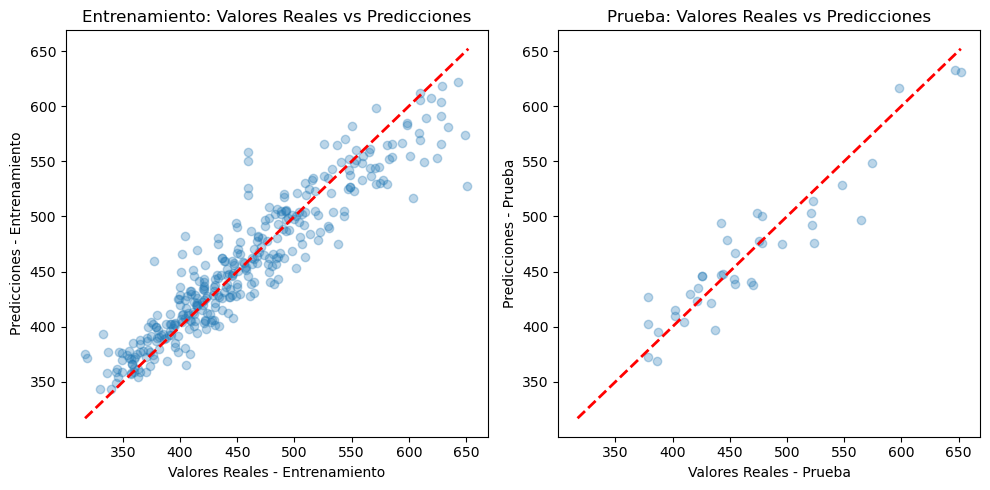

In [11]:
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de las predicciones vs. valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales - Entrenamiento')
plt.ylabel('Predicciones - Entrenamiento')
plt.title('Entrenamiento: Valores Reales vs Predicciones')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_extended, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales - Prueba')
plt.ylabel('Predicciones - Prueba')
plt.title('Prueba: Valores Reales vs Predicciones')

plt.tight_layout()
plt.show()

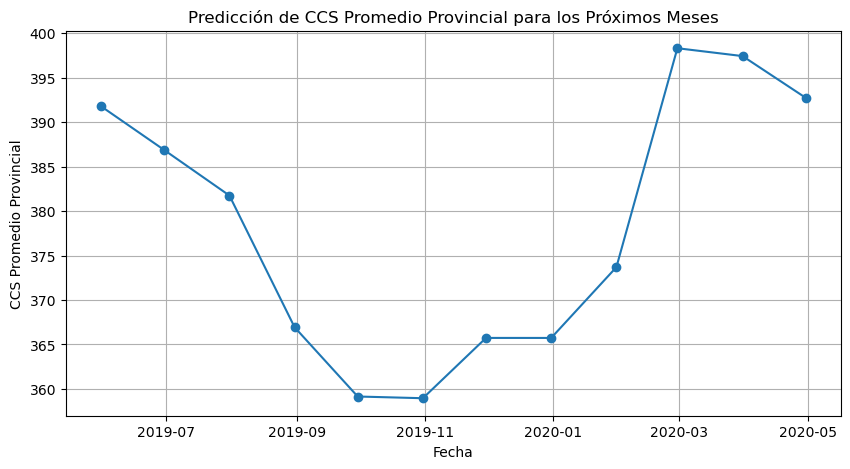

In [12]:
# Determinar la última fecha en el DataFrame
last_year = df['año'].max()
last_month = df.loc[df['año'] == last_year, 'mes'].max()

# Crear una serie de fechas futuras
future_dates = pd.date_range(start=f'{last_year}-{last_month}-01', periods=13, freq='M')[1:]

# Crear un DataFrame con las fechas futuras
future_df = pd.DataFrame({'fecha': future_dates})

# Añadir las columnas de año y mes
future_df['año'] = future_df['fecha'].dt.year
future_df['mes'] = future_df['fecha'].dt.month

# Cambiar el código de la provincia al que deseas analizar
province_code = 0  # Cambia esto al código de la provincia deseada
future_df['provincia_encoded'] = province_code

# Promedio de los ultimos 6 meses, esto puede ser ajustado.
recent_ufc_average = df[df['provincia_encoded'] == province_code].tail(6)['ufc_promedio_provincial'].mean()
future_df['ufc_promedio_provincial'] = recent_ufc_average

# Columnas necesarias para la predicción
X_future = future_df[['ufc_promedio_provincial', 'año', 'mes', 'provincia_encoded']]

# Predecir con el modelo ajustado
future_predictions = best_model_extended.predict(X_future)

# Añadir las predicciones al DataFrame futuro
future_df['predicted_ccs'] = future_predictions

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.plot(future_df['fecha'], future_df['predicted_ccs'], marker='o')
plt.title('Predicción de CCS Promedio Provincial para los Próximos Meses')
plt.xlabel('Fecha')
plt.ylabel('CCS Promedio Provincial')
plt.grid(True)
plt.show()
